In [1]:
from scipy import signal
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [2]:
with open('../vhdl/pwm_out.txt') as fp:
    pwm_frequency = int(fp.readline())
    pwm_data = np.array([float(p) for p in fp.readlines()])
    

In [3]:
cutoff_frequency = 21000 # in Hertz
b, a = signal.butter(4, cutoff_frequency/(pwm_frequency/2), 'low')
output_signal = signal.lfilter(b, a, pwm_data)
ts = np.arange(0, len(pwm_data))/pwm_frequency

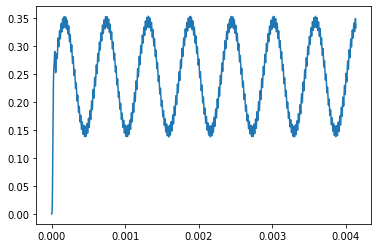

In [4]:
plt.plot(ts, output_signal)

In [5]:
L = len(pwm_data)
output_signal_spectrum = fft(output_signal - np.mean(output_signal))
fs = pwm_frequency/L * np.arange(0, L/2)

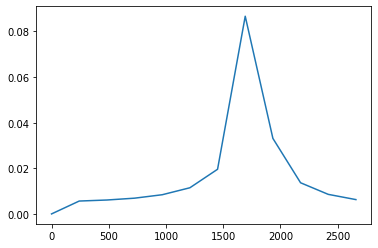

In [6]:
def get_real_scaled_fft(signal):
    signal_fft = fft(signal - np.mean(signal))
    FFT = np.abs(signal_fft)/len(signal)
    Y = FFT[0:len(signal)//2]
    Y[1:] = 2 * Y[1:]
    return Y

Y = get_real_scaled_fft(pwm_data)
max_freq = 3000
max_len = int(np.round(max_freq / pwm_frequency * L))
plt.plot(fs[0:max_len], Y[0:max_len])

In [7]:
print("Maximum of ", np.amax(Y[:max_len]), "at", fs[np.argmax(Y[:max_len])])

Maximum of  0.08664962361171626 at 1692.129181976407
